# Bitwise operations

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
x = cv2.bitwise_not()

In [45]:
def ip(img_print):
    if len(img_print.shape) == 2:
        plt.figure(figsize=(15,10))
        plt.imshow(img_print, cmap='gray')
    else:
        plt.figure(figsize=(15,10))
        plt.imshow(img_print[:,:,::-1])
    print(img_print.shape)
    
def hsvp(img_print):
    x =cv2.cvtColor(img_print, cv2.COLOR_HSV2RGB)
    plt.figure(figsize=(15,10))
    plt.imshow(x)

In [33]:
# With numpy create a black canvas of size 800 x 800 
cnv = np.zeros([800,800],dtype='uint8')
cnv.shape


(800, 800)

(800, 800)


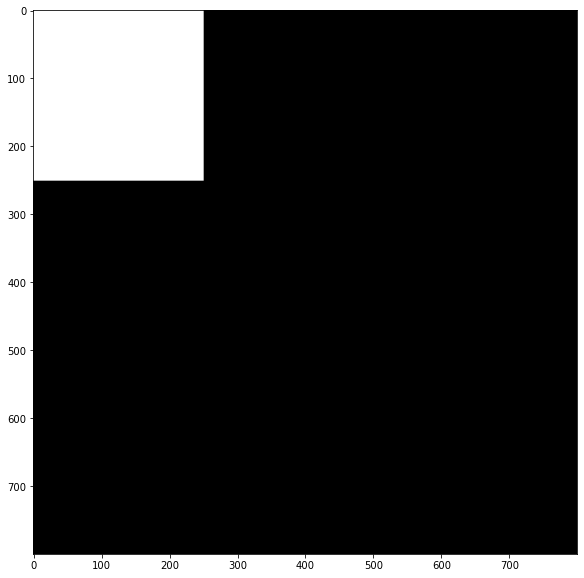

In [34]:
# Make a copy of the canvas and draw a white square of size 250 x 250 on top of the copy of the canvas
img_sqr = cnv.copy()
cv2.rectangle(img_sqr, (0,0), (250,250),(255,255,255), -1)
ip(img_sqr)

(800, 800)


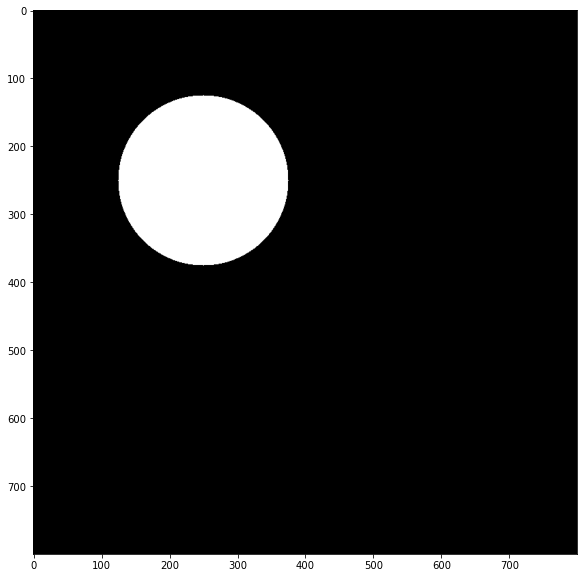

In [21]:
# Make a copy of the origina lcanvas and draw a white circle of size 200 x 200 on top of the copy of the canvas
# Make sure the circle is in a different position of the canvas than the square
img_circle = cnv.copy()
cv2.circle(img_circle, (250,250),125,(255,255,255), -1)
ip(img_circle)

(800, 800)


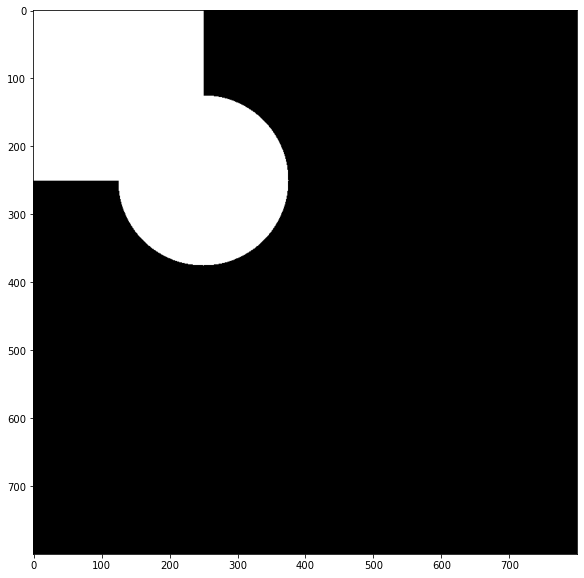

In [29]:
# Create a new image and merge both previous images (square and circle) with a bitwise and operation
bitwise_and = cv2.bitwise_and(img_circle.copy(), img_sqr.copy())
ip(bitwise_and)

(800, 800)


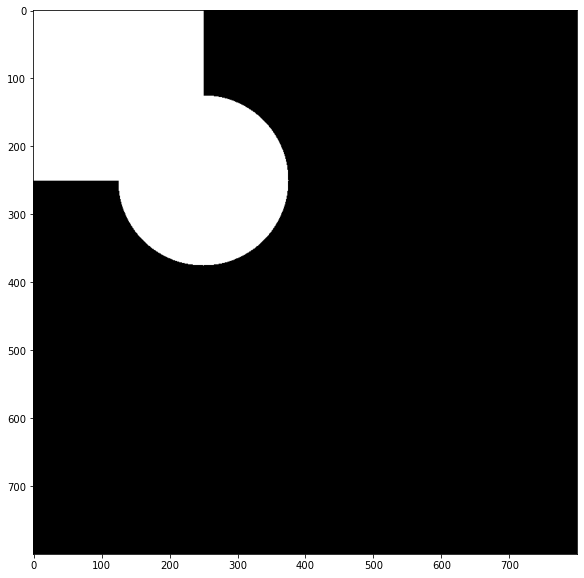

In [35]:
# Create a new image and merge both previous images (square and circle) with a bitwise or operation
bitwise_or = cv2.bitwise_or(img_sqr.copy(),img_circle.copy())
ip(bitwise_or)

(800, 800)


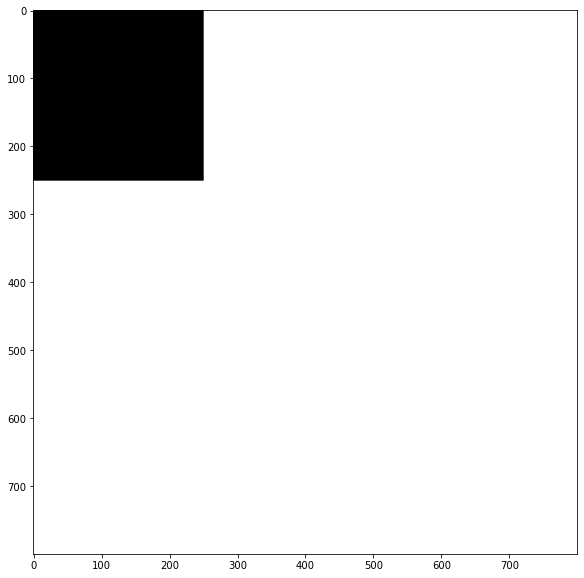

In [37]:
# Create a new image and merge both previous images (square and circle) with a bitwise not operation
bitwise_not = cv2.bitwise_not(img_sqr.copy(),img_circle.copy())
ip(bitwise_not)

(800, 800)


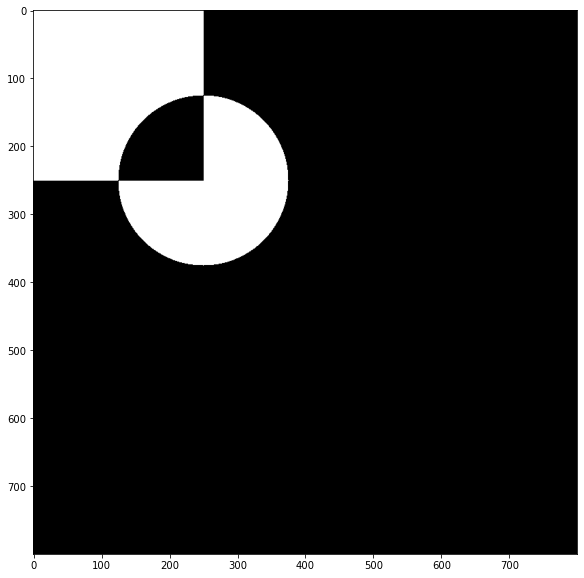

In [38]:
# Create a new image and merge both previous images (square and circle) with a bitwise xor operation
bitwise_xor = cv2.bitwise_xor(img_sqr.copy(),img_circle.copy())
ip(bitwise_xor)

(800, 800)


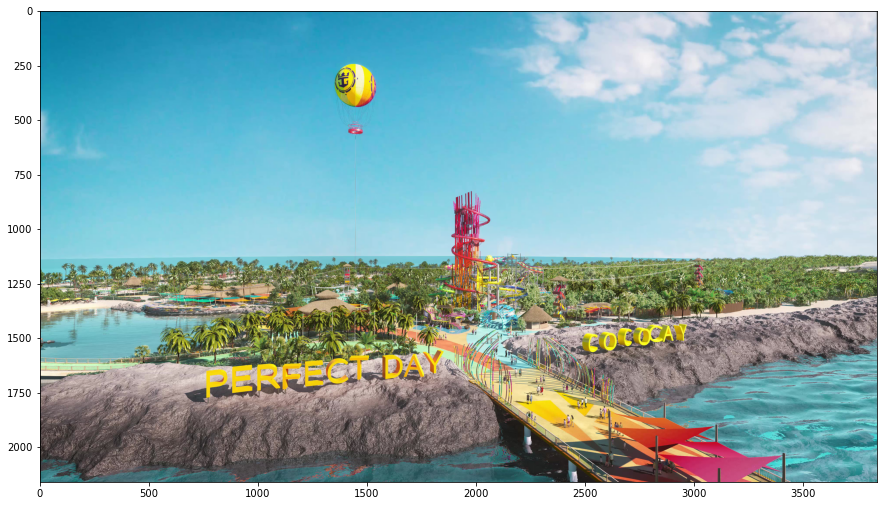

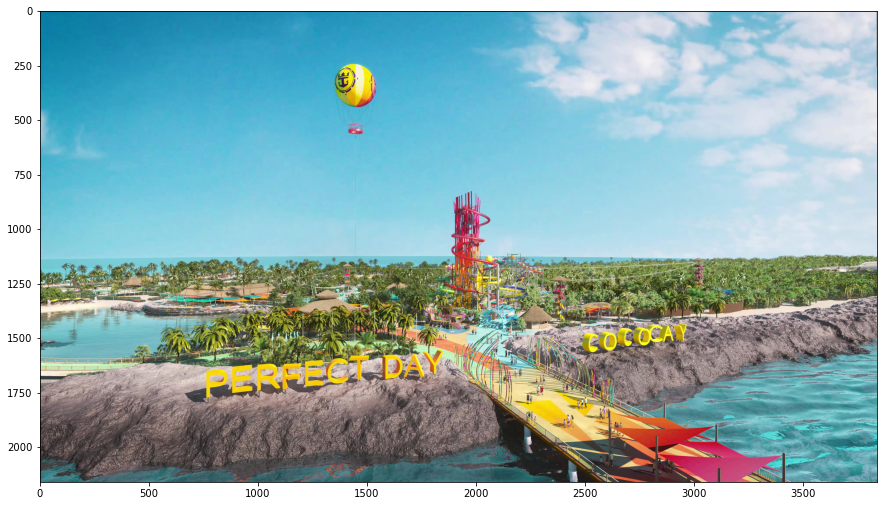

In [46]:
# Load a color image and convert it to HSV
# Identify a prominent color from the image and filter it out
# Create a mask for that color and apply a bitwise and specifying the mask to show only this part of the image
balloon_ori = cv2.imread('img/day4.jpg')
ip(balloon_ori)
balloon_hsv = cv2.cvtColor(balloon_ori.copy(), cv2.COLOR_BGR2HSV)


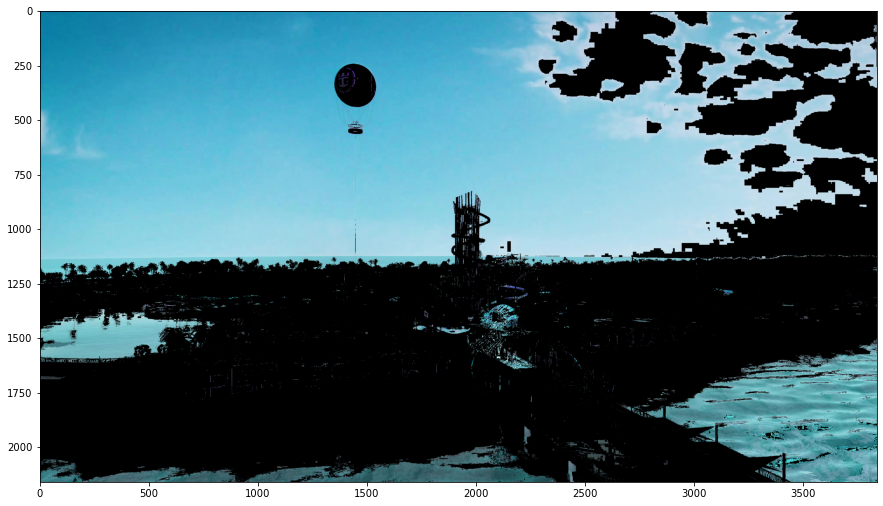

In [49]:
lower_blue = np.array([90,40,20])
upper_blue = np.array([140,255,255])
mask_blue = cv2.inRange(balloon_hsv, lower_blue, upper_blue)
res_blue = cv2.bitwise_and(balloon_hsv,balloon_hsv, mask=mask_blue)
hsvp(res_blue)

In [50]:
# With the same image and mask you have created above now apply a bitwise not specifying the mask 
# to show everything but the color you masked out before
cv2.imwrite('img/thesea.jpg',res_blue)
cv2.imwrite('img/seamask.jpg', mask_blue)

True

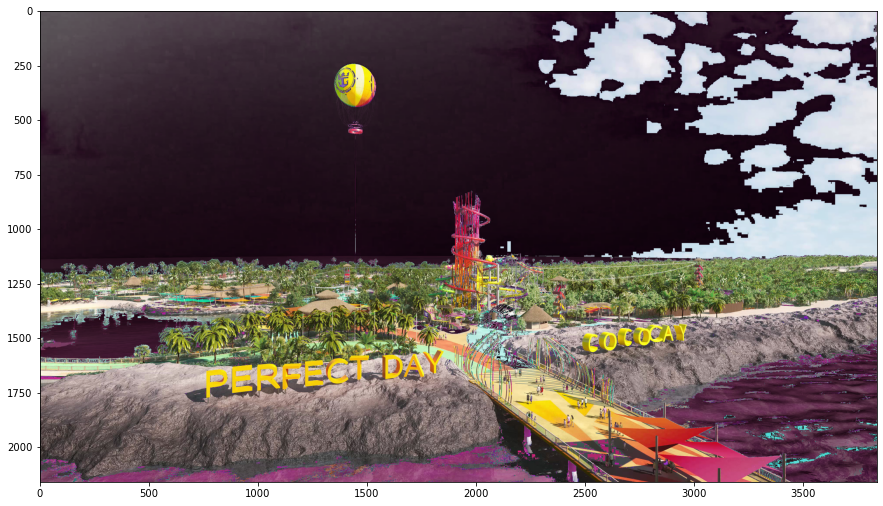

In [55]:
not_res_blue = cv2.bitwise_not(balloon_hsv,balloon_hsv, mask=mask_blue)
hsvp(not_res_blue)